# **Effect of NBA Injuries on Team Record**


**Video**: https://youtu.be/ZNLW5JyyGuA

##**Permissions**

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

- [ X ] YES - make available
- [  ] NO - keep private

##**Overview**

- Before conducting data analysis, we expect that there exists a negative correlation between the number of injured players on an NBA team and the team's performance. 
- After doing the data analysis, we found out that based on the datasets of NBA teams performances and injuries from 2010-2015, the winning percentage decreases as total number of injuries (Relinquished) increases and also increases as the number of previously injured players coming back (Acquired) increases when we predict the winning percentage.
- The linear regression model we generated from the datasets provide enough evidence to support our expectation that there is a negative relationship between injuries and winning percentage and vice versa. However, due to lack of data points, our model is not the best at predicting future winning percentages given the number of injuries on a team.

## **Names**


*   Connor McManigal
*   Ryan Swartz
*   Matthew Cohen
*   Xuwen Yan(Ella)
*   Egor Pustovalov



## **Research Question**
Is there an association between an NBA team’s number and type of injuries to  their record from the 2010 season through the 2015 season? Also, can we accurately predict a team’s change in record based on injuries that occur in future seasons?

## **Background and Prior Work**

The NBA is revered as the best basketball league in the world due to its highly competitive and captivating environment, features of the best professional athletes, and the ability for players to sign contracts, thus generating millions of dollars in revenue. Athletes in the NBA are considered some of the best competitors due to their agility, endurance, speed, size, skills, and talent. In the NBA, a single game consists of four twelve-minute quarters and the game clock is intermittently stopped for timeouts, fouls, quarter breaks, and a halftime. This makes it difficult to judge the exact duration that athletes are on the court, but it is estimated that the average NBA game lasts around two and a half hours and some games can last around three hours.(1) This means that these highly skilled players are on the court competing for a considerably long duration, sometimes with little rest at all. Due to these competitive conditions, it is common for NBA players to get injured, and consequently, have to sit on the bench until they recover. Additionally, a typical NBA season for a team includes eighty-two regular season games with the possibility of additional games if their team advances to the playoffs. Overall, this combined with the physicality of every minute of each game creates an environment with a high rate of injury.

Statistics have been taken on the distribution of injury types across the NBA and show that 57.8% of injuries involve the lower extremities, 19.3% for the upper extremities, 10% for the torso, and 1.8% are related to cervical trauma.(2) Some of the typical lower extremity injuries include the ankles, knees, foot fractures, and muscle tears. Some other common injuries are sprained fingers, concussions, broken noses, facial injuries, and sometimes even leg open fractures.(3) Among other findings, players who weigh more, are taller, and are between the ages of 26 and 34 are considered the most likely to become injured. Interestingly, a study was administered on NBA games from 1988 to 2005 and showed that there were upwards of 12,500 injuries that took place and around 6,200 of them were related to athletes’ ankles. All together, these statistics are concerning, but the NBA released information last year that stated that the injury rates of players was down about six percent.(4)

We want to analyze the impact of how the number of injured players on a team affects the overall team’s efficiency and performance. To do this, we will need to take into consideration a player’s injury history, the duration of the player being out, and the number of injured players on a team.

1. Lw. “NBA Game Length: How Long Is an NBA Game in Minutes?” MARCA, Marca, 10 Mar. 2022, https://www.marca.com/en/basketball/nba/2022/03/10/622a267de2704ef25e8b4585.html.↩

2. aes5559, and aes5559. “SIOWFA15: Science in Our World: Certainty and Controversy.” SiOWfa15 Science in Our World Certainty and Controversy, 11 Dec. 2015, https://sites.psu.edu/siowfa15/2015/12/11/whos-most-likely-to-get-injured-in-the-nba-and-how/.↩

3. Thompson, Darrelle. “What Are the Most Common Injuries in the NBA?” Sportscasting, 13 Sept. 2019, https://www.sportscasting.com/what-are-the-most-common-injuries-in-the-nba/.↩

4. Tim Reynolds | The Associated Press. “NBA Says Injury Rate down Slightly from Normal.” NBA.com, NBA.com, 15 Apr. 2021, https://www.nba.com/news/nba-says-injury-rate-down-slightly-from-normal.↩

## **Hypothesis**

**Alternative Hypothesis**: We propose that there is an association between the number of injured players on a team and their winning record (winning percentage) through the 2010-2015 seasons. Due to the NBA's highly competitive environment, we predict that there will be a negative relationship between a team's number of injured players and their winning percentage. In other words, the more injured players there are on a team, the lower the team's winning percentage will be. Our reasoning is that the teams with more injured players will consequently have more players sitting out and possess less depth in their rosters, thus limiting the team's performance. Also, we believe that we will be able to effectively predict a teams record in the 2016-17 season based on the number of injuries. Additionally, we propose that lower extremity injuries will have a more negative impact on the teams' winning record. This is because the lower extremities of players serve a crucial role in their performance and allow them to get up and down the court.

**Null Hypothesis**: NBA player injuries and injury types will have no effect on a team's record as a result of random chance. The test significance is 5%.


## **Setup** 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from scipy.stats import ks_2samp
from scipy.stats import pearsonr

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


from IPython.display import display_html 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#deal with excel datasets
import pip
pip.main(["install", "openpyxl"])


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0

## **Data Cleaning**
The following section presents information on the data cleaning steps for the two datasets used in this report. 

## First Dataset - Injury Stats
### Link to Dataset: https://www.kaggle.com/datasets/ghopkins/nba-injuries-2010-2018
### No. Observations: 17,408 
This dataset describes the occurrence, injury type, player team, and time of injury for NBA players in the 2010 - 2020 years. 

The information present here will be combined with the Historical NBA Performance dataset to match players with their teams for a given year. This will allow us to show how the number of injuries across different players for the same team impacts the team's historical performance. The data starts as two different types. A relinquished injury has a date, name, and notes about the injury that occured. An acquired injury has a date, name, and notes about the return of the injured player. At the end, we will have counts of the number of acquired/relinquished injuries and counts of injuries that had certain body counts in the 'Notes' column for each season of each team. 

In [ ]:
#first dataset - Injury stats
injury = pd.read_csv('injuries_2010-2020.csv')
injury

,Date,Team,Acquired,Relinquished,Notes
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely)
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)
...,...,...,...,...,...
27100,2020-09-30,Lakers,Dion Waiters,NaN,activated from IL
27101,2020-10-02,Heat,NaN,Bam Adebayo,strained neck (DTD)
27102,2020-10-02,Heat,NaN,Goran Dragic,placed on IL with torn plantar fascia in left ...
27103,2020-10-02,Heat,Chris Silva,NaN,activated from IL


The NBA season roughly goes from October until June. So we are interpreting 
the column 'Season' as the year the season started, i.e. any injury happening in the 2015-2016 season will be read as the Season: 2015.


In [ ]:
injury_original = injury.assign(
    Season = injury.get('Date').apply(lambda s: int(s.split('-')[0])- np.where(int(s.split('-')[1]) < 9, 1, 0)))
#2015-16 season ended June 19, 2016
#index 15819 -> end of 2015 season
injury = injury_original[injury_original['Season']<2017]

grouped_by_team_year is a data frame that has the counts of Acquired and Relinquished from the injury dataset. Relinquished means that a player was injured and placed on the Injury List (IL) and not playing anymore. Acquired means they were taken off the IL and are playing again. Since each entry in injury corresponds to a relinquishment or acquisition to the IL, we can count how many players were put on the IL (Relinquished) and taken off the IL (Acquired).

In [ ]:
grouped_by_team_year = injury.groupby(['Season','Team']).count().drop(columns=['Date', 'Notes'])
grouped_by_team_year

Acquired  Relinquished
Season Team                                
2010   76ers               26            33
       Blazers             10            48
       Bobcats             52            97
       Bucks               25            98
       Bulls               17            33
...                       ...           ...
2016   Suns                37            58
       Thunder             23            36
       Timberwolves        18            31
       Warriors            66            88
       Wizards             43            50

[211 rows x 2 columns]

Here, we are taking all entries in the injury dataset that are an acquisition from the IR, meaning they are returning to play. 

In [ ]:
acquired_injury = injury.dropna(subset=['Acquired'])
acquired_injury

,Date,Team,Acquired,Relinquished,Notes,Season
53,2010-10-27,Heat,Jerry Stackhouse,NaN,activated from IL,2010
81,2010-10-27,Rockets,Jermaine Taylor,NaN,activated from IL,2010
101,2010-10-29,Cavaliers,Samardo Samuels,NaN,activated from IL,2010
103,2010-10-29,Celtics,Luke Harangody,NaN,activated from IL,2010
105,2010-10-29,Grizzlies,Marc Gasol,NaN,activated from IL,2010
...,...,...,...,...,...,...
18934,2017-05-19,Celtics,Jordan Mickey,NaN,activated from IL,2016
18937,2017-05-20,Warriors,Andre Iguodala,NaN,activated from IL,2016
18939,2017-05-21,Celtics,James Young,NaN,activated from IL,2016
18942,2017-05-22,Spurs,Kawhi Leonard,NaN,activated from IL,2016


In [ ]:
acquired_injury.groupby(['Season','Team']).count().drop(columns=['Date','Notes','Relinquished'])

Acquired
Season Team                  
2010   76ers               26
       Blazers             10
       Bobcats             52
       Bucks               25
       Bulls               17
...                       ...
2016   Suns                37
       Thunder             23
       Timberwolves        18
       Warriors            66
       Wizards             43

[210 rows x 1 columns]

Similarly: Here we are taking all entries in the injury dataset that are a relinquishment from the IR, meaning they are now injured and not playing.

In [ ]:
relinquished_injury = injury.dropna(subset=['Relinquished'])
relinquished_injury

,Date,Team,Acquired,Relinquished,Notes,Season
0,2010-10-03,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...,2010
1,2010-10-06,Pistons,NaN,Jonas Jerebko,torn right Achilles tendon (out indefinitely),2010
2,2010-10-06,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...,2010
3,2010-10-08,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely),2010
4,2010-10-08,Nets,NaN,Troy Murphy,strained lower back (out indefinitely),2010
...,...,...,...,...,...,...
18950,2017-07-25,Suns,NaN,Brandon Knight,torn ACL in left knee (out for season),2016
18951,2017-07-30,Clippers,NaN,Danilo Gallinari,fractured bone in right hand (out indefinitely),2016
18952,2017-08-08,Grizzlies,NaN,Ben McLemore,surgery on right foot to repair fracture (out ...,2016
18953,2017-08-10,Thunder,NaN,Patrick Patterson,arthroscopic surgery on his left knee (out ind...,2016


In [ ]:
relinquished_injury.groupby(['Season','Team']).count().drop(columns=['Date','Notes','Acquired'])

Relinquished
Season Team                      
2010   76ers                   33
       Blazers                 48
       Bobcats                 97
       Bucks                   98
       Bulls                   33
...                           ...
2016   Suns                    58
       Thunder                 36
       Timberwolves            31
       Warriors                88
       Wizards                 50

[211 rows x 1 columns]

We also want to observe the type of injury and see if certain injuries hurt a team's record more than others. So we are looking through each entry 'Notes' and counting for each season and team how many knee, ankle, foot, hand, finger, and back injuries there were. 

In [ ]:
knee = injury[injury['Notes'].str.contains("knee")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
knee = knee.rename(columns={"Relinquished": "Knee injuries"})
ankle = injury[injury['Notes'].str.contains("ankle")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
ankle = ankle.rename(columns={"Relinquished": "Ankle injuries"})
foot = injury[injury['Notes'].str.contains("foot")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
foot = foot.rename(columns={"Relinquished": "Foot injuries"})
hand = injury[injury['Notes'].str.contains("hand")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
hand = hand.rename(columns={"Relinquished": "Hand injuries"})
finger = injury[injury['Notes'].str.contains("finger")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
finger = finger.rename(columns={"Relinquished": "Finger injuries"})
back = injury[injury['Notes'].str.contains("back")]\
                .groupby(['Season','Team']).count().drop(columns=['Date','Notes', 'Acquired'])
back = back.rename(columns={"Relinquished": "Back injuries"})

knee_styler = knee.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to knee')
ankle_styler = ankle.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to ankle')
foot_styler = foot.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to foot')
finger_styler = finger.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to finger')
back_styler = back.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to back')
hand_styler = hand.head().style.set_table_attributes("style='display:inline'").set_caption('injuries related to hand')

display_html(knee_styler._repr_html_()+\
             ankle_styler._repr_html_()+\
             foot_styler._repr_html_()+\
             finger_styler._repr_html_()+\
             back_styler._repr_html_()+\
             hand_styler._repr_html_(), raw=True)

injuries related to knee 
 
 
   
   
 Knee injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 2 
 
 
 Blazers 
 23 
 
 
 Bobcats 
 19 
 
 
 Bucks 
 4 
 
 
 Cavaliers 
 3 
 
 
 

 
 injuries related to ankle 
 
 
   
   
 Ankle injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Blazers 
 4 
 
 
 Bobcats 
 6 
 
 
 Bucks 
 5 
 
 
 Bulls 
 6 
 
 
 Cavaliers 
 12 
 
 
 

 
 injuries related to foot 
 
 
   
   
 Foot injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Bucks 
 24 
 
 
 Bulls 
 1 
 
 
 Heat 
 3 
 
 
 Jazz 
 5 
 
 
 Kings 
 7 
 
 
 

 
 injuries related to finger 
 
 
   
   
 Finger injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 1 
 
 
 Bulls 
 2 
 
 
 Cavaliers 
 4 
 
 
 Celtics 
 1 
 
 
 Kings 
 1 
 
 
 

 
 injuries related to back 
 
 
   
   
 Back injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 76ers 
 1 
 
 
 Blazers 
 1 
 
 
 Bobcats 
 7 
 
 
 Bucks 
 10 
 
 
 Cavaliers 
 12 
 
 
 

 
 injuries related to hand 
 
 
   
   
 Hand injuries 
 
 
 Season 
 Team 
   
 
 
 
 
 2010 
 Blazers 
 1 
 
 
 Heat 
 2 
 
 
 2011 
 Bucks 
 3 
 
 
 Cavaliers 
 2 
 
 
 Clippers 
 2

## Second Dataset - Historical NBA Performance
### Link to Dataset: https://data.world/gmoney/nba-team-records-by-year
### No. Observations: 208
This dataset describes the number of wins, number of losses, and winning percentage of an NBA team in a given year. 

The information present here will be combined with the injury dataset to match players with their teams present in this dataset for a given year. This will allow us to show how the number of injuries across different players for the same team impacts the team's historical performance. 
The data starts with a year, team name, record, and winning percentage. We will be creating the 'Season' variable again and adding a 'Win' and 'Loss' column based on the record. 

In [ ]:
#second dataset - Team Performance
performance = pd.read_excel('Historical_NBA_Performance.xlsx')
performance

,Year,Team,Record,Winning Percentage,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2016-17,Celtics,25-15,0.625,NaN,NaN,NaN,NaN,NaN,NaT
1,2015-16,Celtics,48-34,0.585,NaN,NaN,NaN,NaN,NaN,NaT
2,2014-15,Celtics,40-42,0.488,NaN,NaN,NaN,NaN,NaN,NaT
3,2013-14,Celtics,25-57,0.305,NaN,NaN,NaN,NaN,NaN,NaT
4,2012-13,Celtics,41-40,0.506,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
1412,1965-66,Bullets,38-42,0.475,NaN,NaN,NaN,NaN,NaN,NaT
1413,1964-65,Bullets,37-43,0.463,NaN,NaN,NaN,NaN,NaN,NaT
1414,1963-64,Bullets,31-49,0.388,NaN,NaN,NaN,NaN,NaN,NaT
1415,1962-63,Zephyrs,25-55,0.313,NaN,NaN,NaN,NaN,NaN,NaT


Let performance_clean be the clean dataset with the columns we want. 


In [ ]:
performance_clean = performance[['Year', 'Team', 'Record', 'Winning Percentage']]

In [ ]:
performance_clean.get('Team').unique()

array(['Celtics', 'Hawks', 'Blackhawks', 'Nets', 'Hornets', 'Bobcats',
       'Bulls', 'Cavaliers', 'Mavericks', 'Nuggets', 'Pistons',
       'Warriors', 'Rockets', 'Pacers', 'Clippers', 'Braves', 'Lakers',
       'Grizzlies', 'Heat', 'Bucks', 'Timberwolves', 'Pelicans', 'Knicks',
       'Thunder', 'Supersonics', 'Magic', '76ers', 'Nationals', 'Suns',
       'Trail Blazers', 'Kings', 'Royals', 'Spurs', 'Raptors', 'Jazz',
       'Wizards', 'Bullets', 'Zephyrs', 'Packers'], dtype=object)

In [ ]:
performance_clean.head()

,Year,Team,Record,Winning Percentage
0,2016-17,Celtics,25-15,0.625
1,2015-16,Celtics,48-34,0.585
2,2014-15,Celtics,40-42,0.488
3,2013-14,Celtics,25-57,0.305
4,2012-13,Celtics,41-40,0.506


In [ ]:
#drops 2016-17 seasons
performance_clean = performance_clean[performance_clean.Year != "2016-17"]

To be able to merge this dataset with the injuries dataset we're going to group both by team name and season. The year will reflect this too, and for simplicity we are going to have the same interpretation where 2015-2016 season corresponds to 'Season' 2015. We also will split the record column into two more additional columns that have 'Win' and 'Loss' based on the team's record that season.

In [ ]:
#changes Year column to Season column
performance_clean.rename(columns = {'Year': 'Season'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#adds columnn Year using indexing on Season column
def season_to_year(s):
  return s.split('-')[0]
performance_clean['Year'] = performance_clean['Season'].astype(str).apply(season_to_year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#filters Year column to grab Seasons 2010-2016
performance_clean['Year'] = performance_clean['Year'].astype(int)

performance_clean = performance_clean[2010 <= performance_clean.get('Year')]\
                     [(performance_clean[2010 <= performance_clean.get('Year')]).get('Year')<=2016]
performance_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Season,Team,Record,Winning Percentage,Year
0,2016-17,Celtics,25-15,0.625,2016
1,2015-16,Celtics,48-34,0.585,2015
2,2014-15,Celtics,40-42,0.488,2014
3,2013-14,Celtics,25-57,0.305,2013
4,2012-13,Celtics,41-40,0.506,2012
...,...,...,...,...,...
1363,2014-15,Wizards,46-36,0.561,2014
1364,2013-14,Wizards,44-38,0.537,2013
1365,2012-13,Wizards,29-53,0.354,2012
1366,2011-12 *,Wizards,20-46,0.303,2011


In [ ]:
#cleans irregular values of Season column for the years 2010-11 and 2011-12
def fix_season(s):
  if (s == '2011-12 *'):
    return '2011-12'
  elif (s == datetime.datetime(2010, 11, 1, 0, 0)):
    return '2010-11'
  else:
    return s

performance_clean['Season'] = performance_clean['Season'].apply(fix_season)
#change season to starting year
# performance_clean['Season'] = performance_clean['Season'].split('-')[0]
performance_clean['Season'] = performance_clean['Season'].apply(lambda x: int(x.split('-')[0]))

Here, we are adding two more columns: 'Win' and 'Loss' from extraction of the record column.

In [ ]:
def win(s):
  return s.split('-')[0]
def loss(s):
  return s.split('-')[1]
performance_clean['Win'] = performance_clean['Record'].apply(win)
performance_clean['Loss'] = performance_clean['Record'].apply(loss)
performance_clean.drop(['Record'], axis=1)

,Season,Team,Winning Percentage,Year,Win,Loss
0,2016,Celtics,0.625,2016,25,15
1,2015,Celtics,0.585,2015,48,34
2,2014,Celtics,0.488,2014,40,42
3,2013,Celtics,0.305,2013,25,57
4,2012,Celtics,0.506,2012,41,40
...,...,...,...,...,...,...
1363,2014,Wizards,0.561,2014,46,36
1364,2013,Wizards,0.537,2013,44,38
1365,2012,Wizards,0.354,2012,29,53
1366,2011,Wizards,0.303,2011,20,46


In [ ]:
unique_team_d1=['Celtics', 'Hawks', 'Blackhawks', 'Nets', 'Hornets', 'Bobcats',
       'Bulls', 'Cavaliers', 'Mavericks', 'Nuggets', 'Pistons',
       'Warriors', 'Rockets', 'Pacers', 'Clippers', 'Braves', 'Lakers',
       'Grizzlies', 'Heat', 'Bucks', 'Timberwolves', 'Pelicans', 'Knicks',
       'Thunder', 'Supersonics', 'Magic', '76ers', 'Nationals', 'Suns',
       'Trail Blazers', 'Kings', 'Royals', 'Spurs', 'Raptors', 'Jazz',
       'Wizards', 'Bullets', 'Zephyrs', 'Packers']

unique_team_d2=['Bulls', 'Pistons', 'Blazers', 'Nets', 'Nuggets', 'Bucks', 'Kings',
 'Bobcats', 'Warriors', 'Suns', 'Heat', 'Thunder', 'Timberwolves',
 'Celtics', 'Lakers', 'Rockets', '76ers', 'Cavaliers', 'Clippers',
 'Grizzlies', 'Hawks', 'Hornets', 'Jazz', 'Knicks', 'Mavericks',
 'Pacers', 'Raptors', 'Spurs', 'Magic', 'Wizards', 'Pelicans',
 'Bullets']

d1_as_set = set(unique_team_d1)
intersection = d1_as_set.intersection(unique_team_d2)

unique_teams = list(intersection)
#unique_teams

To combine our two datasets: we will be linking the season columns together. For the injury dataset, this will be the start year of the season (i.e. 2010), and for the performance dataset, this will be the range (2010-11).

## **Data Analysis & Results**



We need to combine all of our data frames together so we'll be merging them on 'Season' and 'Team'. Our merged data frame will contain the number of Relinquished, Acquired, and all types of injuries with the record and other data from our performance dataframe.

In [ ]:
injuries2 = pd.merge(grouped_by_team_year, knee, how='left', on=['Season', 'Team'])
injuries3= pd.merge(injuries2, ankle, how='left', on=['Season', 'Team'])
injuries4 = pd.merge(injuries3, foot, how='left', on=['Season', 'Team'])
injuries5 = pd.merge(injuries4, finger, how='left', on=['Season', 'Team'])
injuries6 = pd.merge(injuries5, back, how='left', on=['Season', 'Team'])
injuries7 = pd.merge(injuries6, hand, how='left', on=['Season', 'Team'])
merged_data = pd.merge(injuries7, performance_clean, how='right', on=['Season', 'Team'])

In [ ]:
merged_data['Knee injuries'] = merged_data['Knee injuries'].fillna(0)
merged_data['Ankle injuries'] = merged_data['Ankle injuries'].fillna(0)
merged_data['Foot injuries'] = merged_data['Foot injuries'].fillna(0)
merged_data['Finger injuries'] = merged_data['Finger injuries'].fillna(0)
merged_data['Back injuries'] = merged_data['Back injuries'].fillna(0)
merged_data['Hand injuries'] = merged_data['Hand injuries'].fillna(0) 

In [ ]:
merged_data

,Season,Team,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Record,Winning Percentage,Year,Win,Loss
0,2016,Celtics,50.0,65.0,2.0,8.0,0.0,0.0,1.0,0.0,25-15,0.625,2016,25,15
1,2015,Celtics,42.0,52.0,2.0,4.0,1.0,0.0,2.0,0.0,48-34,0.585,2015,48,34
2,2014,Celtics,28.0,36.0,1.0,6.0,1.0,1.0,1.0,2.0,40-42,0.488,2014,40,42
3,2013,Celtics,6.0,99.0,54.0,26.0,0.0,0.0,0.0,0.0,25-57,0.305,2013,25,57
4,2012,Celtics,7.0,46.0,8.0,15.0,0.0,0.0,2.0,0.0,41-40,0.506,2012,41,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2014,Wizards,33.0,43.0,3.0,3.0,2.0,0.0,3.0,1.0,46-36,0.561,2014,46,36
204,2013,Wizards,13.0,53.0,18.0,2.0,7.0,3.0,4.0,0.0,44-38,0.537,2013,44,38
205,2012,Wizards,13.0,99.0,20.0,16.0,5.0,0.0,2.0,12.0,29-53,0.354,2012,29,53
206,2011,Wizards,5.0,68.0,18.0,2.0,24.0,1.0,1.0,2.0,20-46,0.303,2011,20,46


In [ ]:
merged_data.sum()

Season                                                           418699
Team                  CelticsCelticsCelticsCelticsCelticsCelticsCelt...
Acquired                                                         5810.0
Relinquished                                                    12442.0
Knee injuries                                                    1981.0
Ankle injuries                                                   1521.0
Foot injuries                                                     614.0
Finger injuries                                                   127.0
Back injuries                                                     692.0
Hand injuries                                                     184.0
Record                25-1548-3440-4225-5741-4039-2756-2623-1748-346...
Winning Percentage                                              104.175
Year                                                             418699
Win                   254840254139562348603844404492138444922242

**Above is merged_data or one of our main data frames we used for our analysis, which includes key variables:**

- Season
- Acquired (how many injured players returned to the roster in that season)
- Relinquished (total number of the specified injuries per season)
- Injury types:
  - knee/ankle/foot/finger/back/hand
- Record
- Winning Percentage

Text(0.5, 1.0, 'NBA Teams winning percentage 2010-2015')

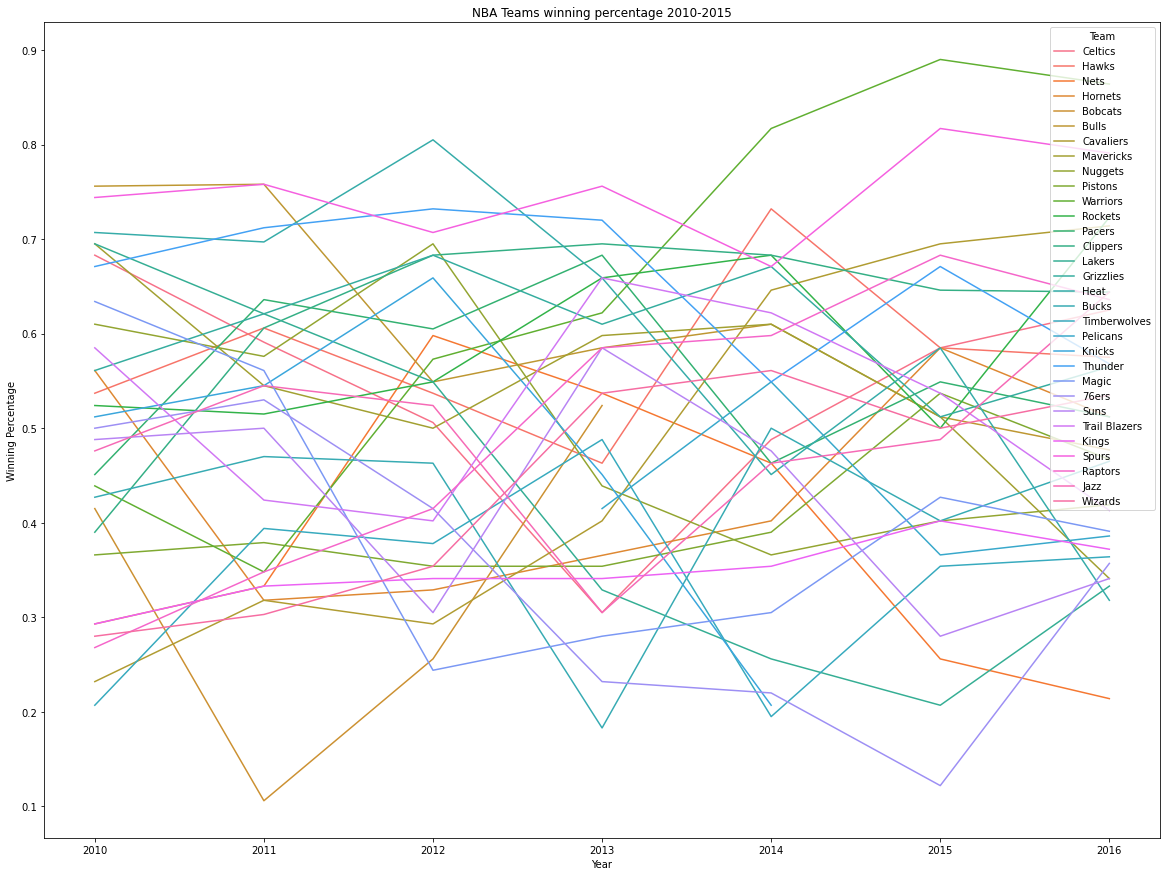

In [ ]:
#Plot Winning Percentage (winning vs losing record) over 2010-2015 seasons for all teams
#x-axis: Year
#y-axis: Winning Percentage
plt.figure(figsize=(20,15))
sns.lineplot(data=merged_data.drop(columns=['Relinquished']), x = "Year", y = "Winning Percentage", hue = "Team").set_title('NBA Teams winning percentage 2010-2015')

The graph above shows how the Winning Percentage (record) for each team changed over the six seasons we analyzed. It is typical for some teams' records to stay consistent over a duration because they have star players under contract or have consistent talent. Other teams may fluctuate due to losing players during free agency, injury, or trades. This graph is extremely hard to interpret so it only served as our initial data plot to get us started on our analysis.

In [ ]:
#Create Difference variable
#Difference = the current season Winning Percentage of a team minus that team's average Winning Percentage
avg = merged_data.groupby(['Team','Season']).sum().get('Winning Percentage')/merged_data.groupby(['Team','Season']).count().get('Winning Percentage')
avg1 = avg.groupby(['Team']).sum()/6
difference = merged_data.drop_duplicates().groupby(['Team','Season']).sum().get('Winning Percentage') - avg1
difference = pd.DataFrame(difference).reset_index().get('Winning Percentage')
merged_data = merged_data.assign(Difference = difference)
merged_data

,Season,Team,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Record,Winning Percentage,Year,Win,Loss,Difference
0,2016,Celtics,50.0,65.0,2.0,8.0,0.0,0.0,1.0,0.0,25-15,0.625,2016,25,15,0.104000
1,2015,Celtics,42.0,52.0,2.0,4.0,1.0,0.0,2.0,0.0,48-34,0.585,2015,48,34,0.134000
2,2014,Celtics,28.0,36.0,1.0,6.0,1.0,1.0,1.0,2.0,40-42,0.488,2014,40,42,0.019000
3,2013,Celtics,6.0,99.0,54.0,26.0,0.0,0.0,0.0,0.0,25-57,0.305,2013,25,57,-0.164000
4,2012,Celtics,7.0,46.0,8.0,15.0,0.0,0.0,2.0,0.0,41-40,0.506,2012,41,40,-0.176000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2014,Wizards,33.0,43.0,3.0,3.0,2.0,0.0,3.0,1.0,46-36,0.561,2014,46,36,-0.157667
204,2013,Wizards,13.0,53.0,18.0,2.0,7.0,3.0,4.0,0.0,44-38,0.537,2013,44,38,0.025333
205,2012,Wizards,13.0,99.0,20.0,16.0,5.0,0.0,2.0,12.0,29-53,0.354,2012,29,53,0.049333
206,2011,Wizards,5.0,68.0,18.0,2.0,24.0,1.0,1.0,2.0,20-46,0.303,2011,20,46,-0.011667


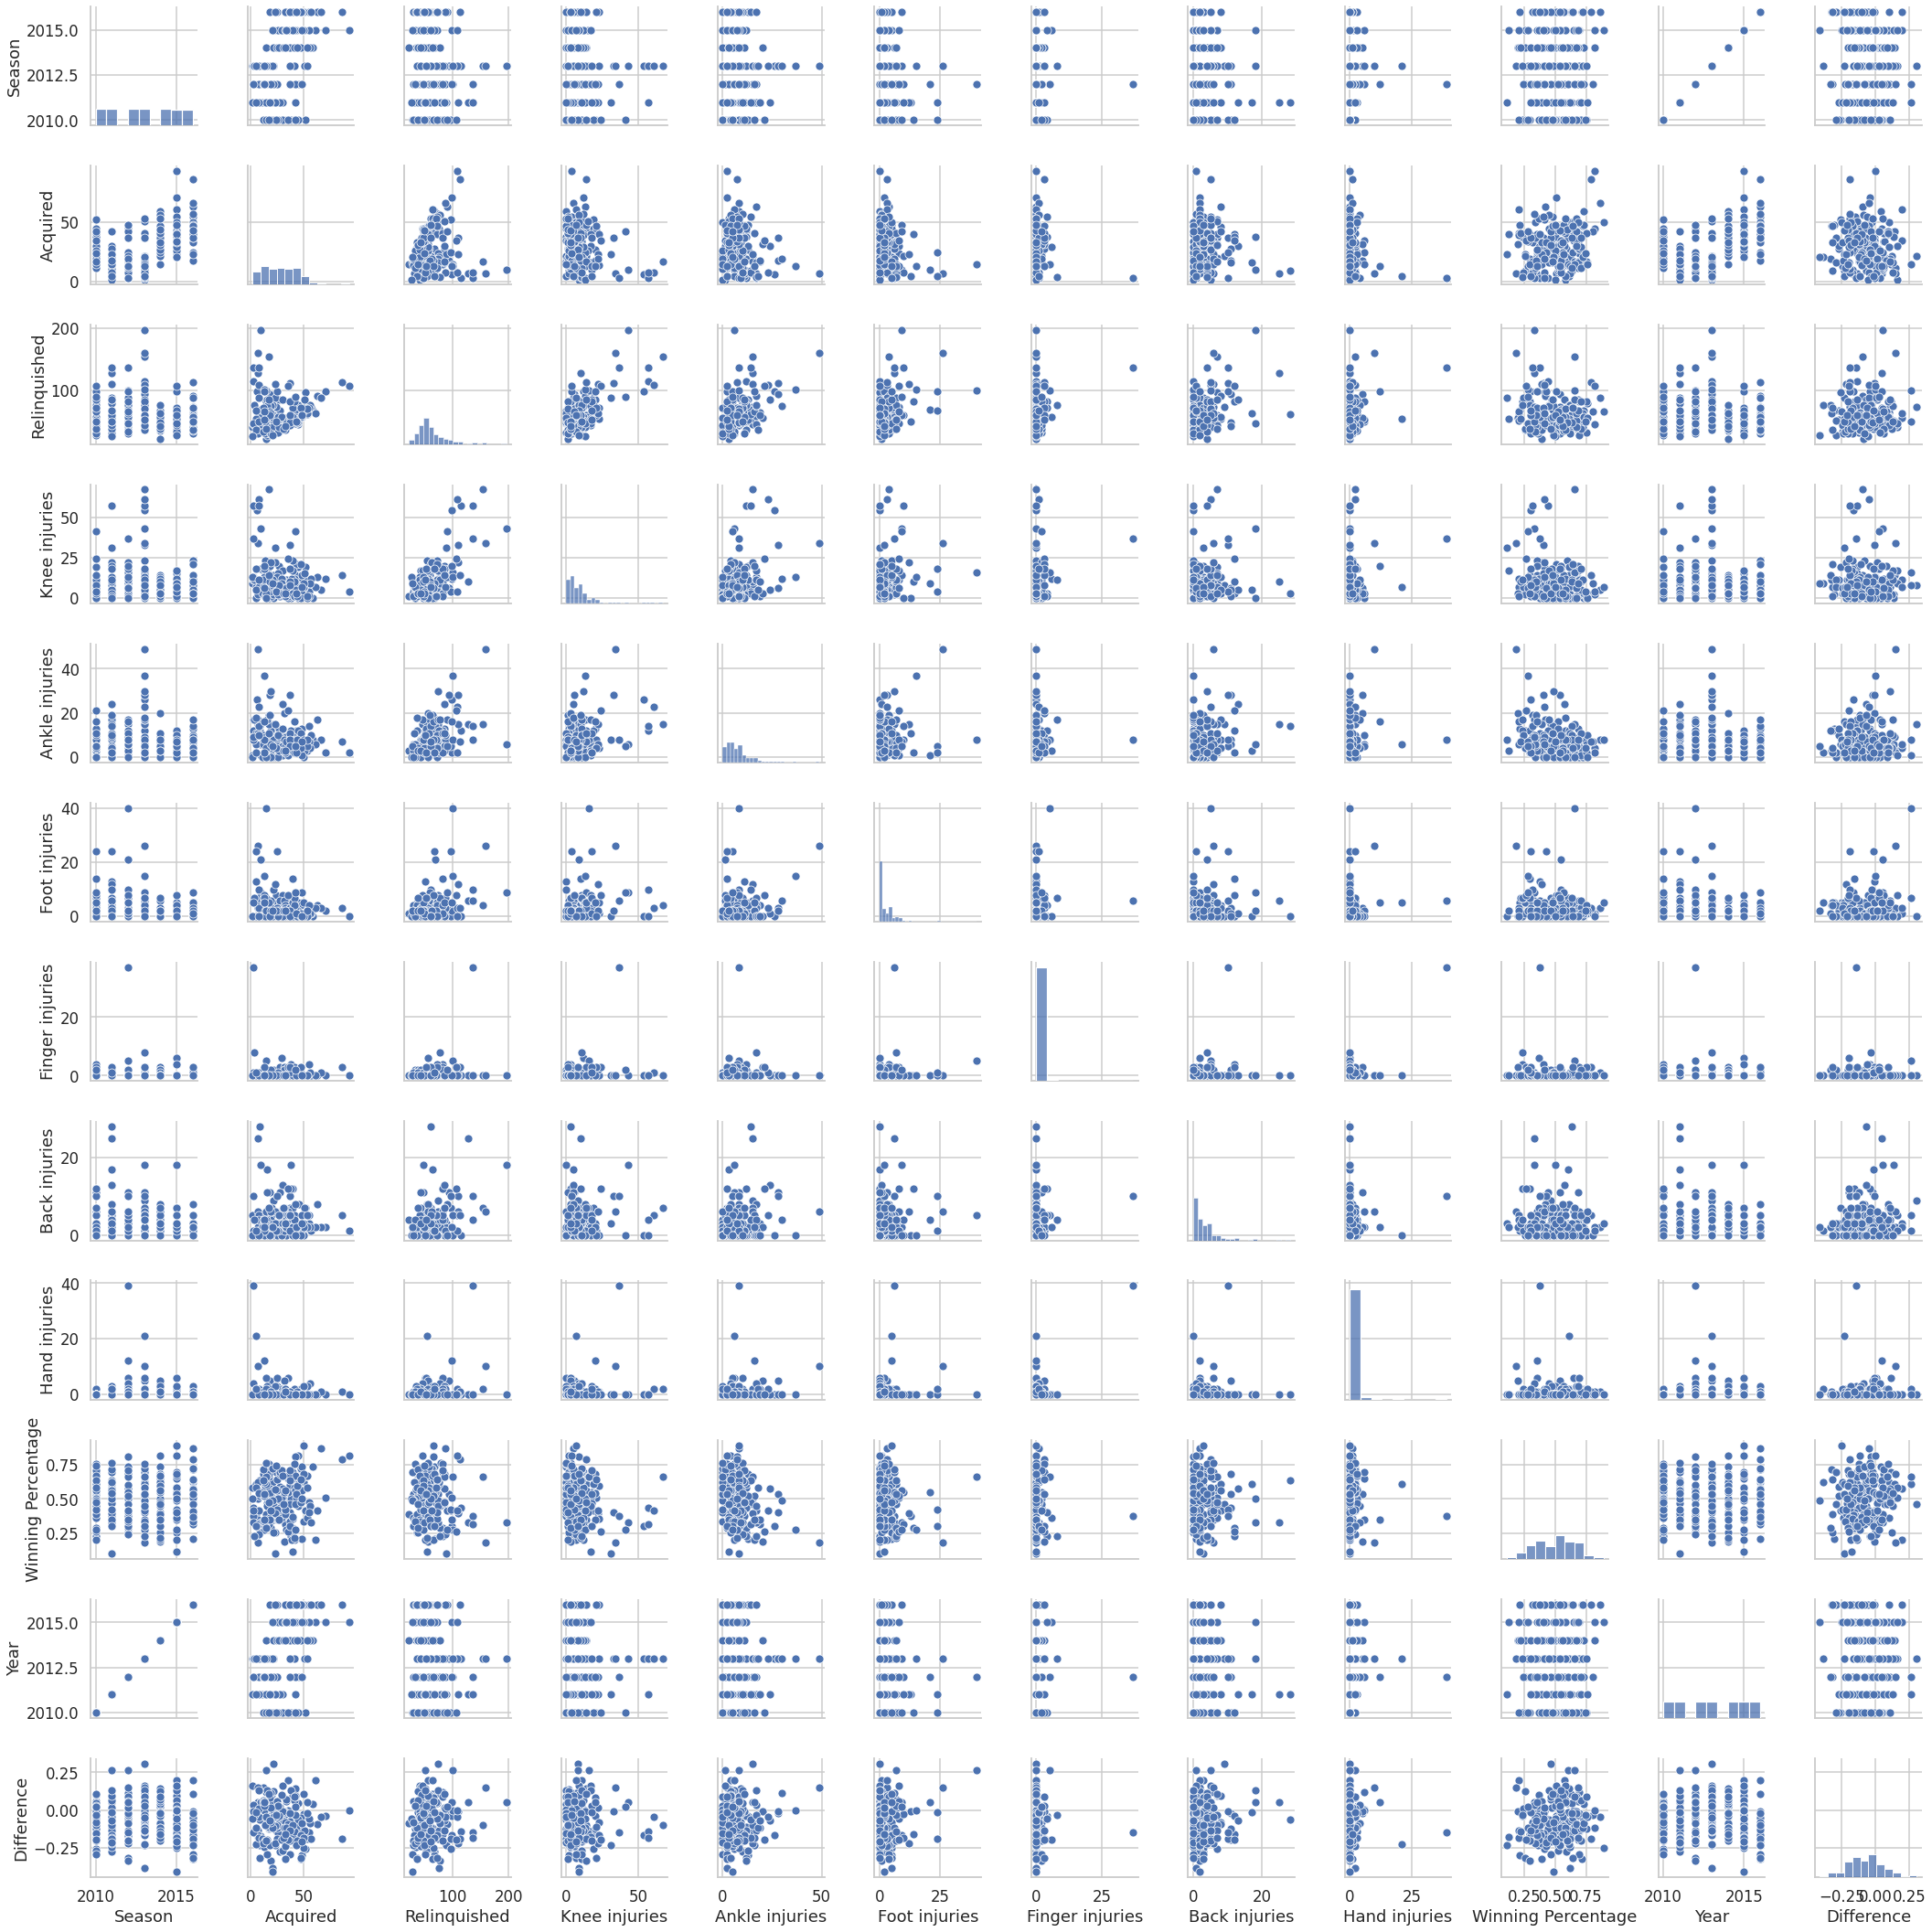

In [ ]:
#Pairplot of merged_data containing all variables
sns.pairplot(merged_data)
plt.show()

The pair plot above shows a combination of the variables from the merged_data dataframe. This served the purpose of giving us a general idea of what the variables mapped on each other would look like.

Text(0.5, 1.0, 'Number of Hand Injuries vs Difference in Record')

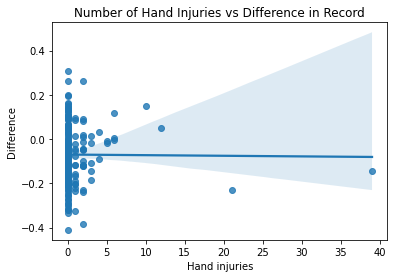

In [ ]:
#Exploratory plot: Difference vs. Hand Injury (One such example with Difference)
sns.regplot(data=merged_data, x="Hand injuries", y="Difference").set_title('Number of Hand Injuries vs Difference in Record')

After creating the Difference variable, we plotted and tested what it would look like on a scatter plot. Originally, we did this to all injury types on separate scatter plots, but we didn't like what we observed. Many of these data points were clustered near the y-axis (at x = 0) and for the sake of our analysis, going forward we decided that it wasn't the best idea to use Difference as our y variable. We believed that the Difference variable was tragically flawed in that it didn't contain enough data points to be accurately compared. If we were to have conducted our analysis over many more seasons, we believe this would have been a more useful measurement.


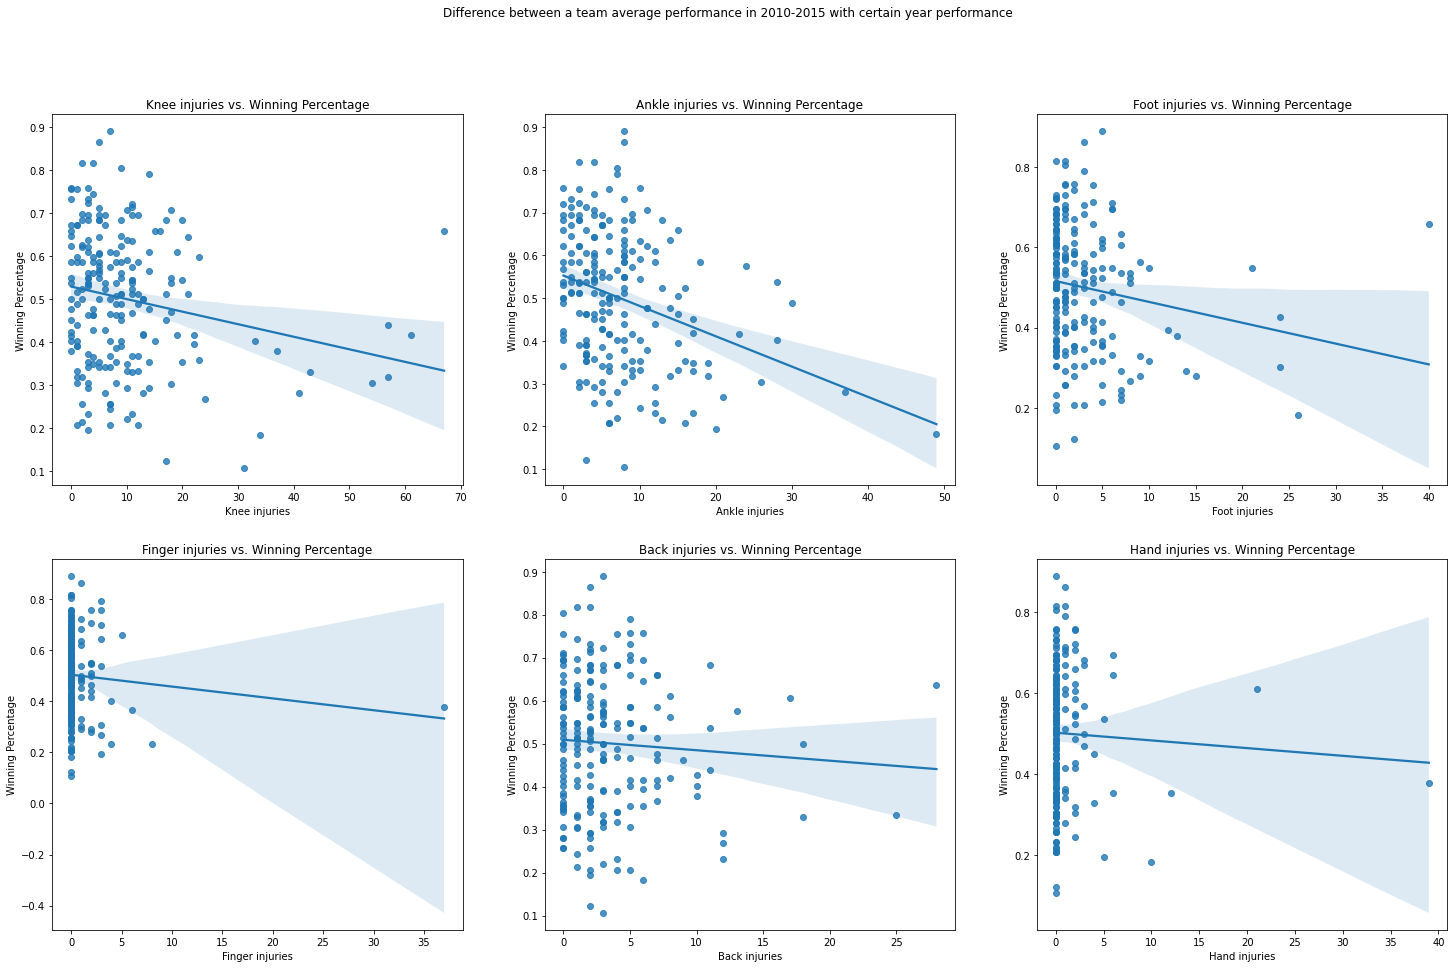

In [ ]:
#x-axis: Injury Type
#y-axis: Winning Percentage

fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.suptitle('Difference between a team average performance in 2010-2015 with certain year performance')
ax=sns.regplot(ax=axes[0, 0],data=merged_data, x="Knee injuries", y="Winning Percentage")
ax.set_title("Knee injuries vs. Winning Percentage")
ax=sns.regplot(ax=axes[0, 1],data=merged_data, x="Ankle injuries", y="Winning Percentage")
ax.set_title("Ankle injuries vs. Winning Percentage")
ax=sns.regplot(ax=axes[0, 2],data=merged_data, x="Foot injuries", y="Winning Percentage")
ax.set_title("Foot injuries vs. Winning Percentage")
ax=sns.regplot(ax=axes[1, 0],data=merged_data, x="Finger injuries", y="Winning Percentage")
ax.set_title("Finger injuries vs. Winning Percentage")
ax=sns.regplot(ax=axes[1, 1],data=merged_data, x="Back injuries", y="Winning Percentage")
ax.set_title("Back injuries vs. Winning Percentage")
ax=sns.regplot(ax=axes[1, 2],data=merged_data, x="Hand injuries", y="Winning Percentage")
ax.set_title("Hand injuries vs. Winning Percentage")

f1 = plt.gcf()

These graphs are a continuation of what we attempted to do above. So, we plotted each type of injury versus the Winning Percentages. From an initial glance, we thought this was much better than plotting Difference vs. Injury types, however, it wasn't exactly what we were looking for. Across the different types of injuries, we observed regression lines that were weak negatives. As a result, we were happy to at least witness that there were somewhat negative relationships between the number of injuries and winning percentages. Additionally, here we witnessed a stronger negative correlation with lower extremity injuries (knee/ankle/foot) than upper extremity injuries (finger/back/hand).

But we were far from done. Many of these data points were still clustered around the y-axis and the regression lines did not fit the data well, so as a result, we believed that the outliers could have skewed the data. Another reason we thought these visualizations weren't the best was because we felt that we did not have enough data, thus potentially leading to confounds or spurious correlations.

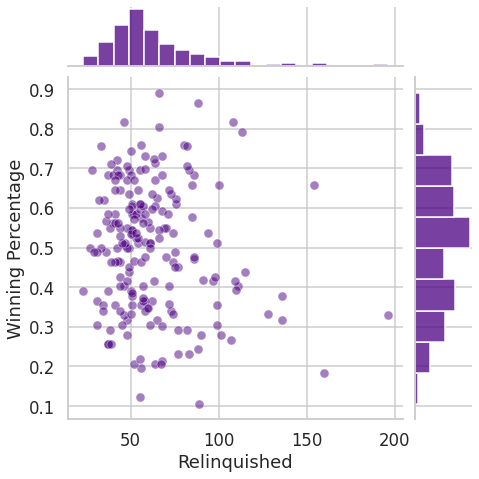

In [ ]:
#Exploratory plot: relationship between Winning Percentage and Relinquished (the overall number of injuries)
#x-axis: Relinquished
#y-axis: Winning Percentage

sns.set() 
sns.set_context('talk')
sns.set_style('whitegrid')

sns.jointplot(x = merged_data['Relinquished'], y = merged_data['Winning Percentage'], height = 7, color = 'indigo', alpha = 0.5)
#plt.fig.suptitle("Number of Relinquished Injuries vs Winning Percentage")

According to this graph, we observed that the distribution of Winning Percentage was relatively normally distributed and the Relinquished variable distribution was rightly skewed. Also, this scatter plot possessed some outliers in the Relinquished direction of the graph.

In order to better understand if there is a linear relationship that exists, we drew a linear regression on the scatter plot.

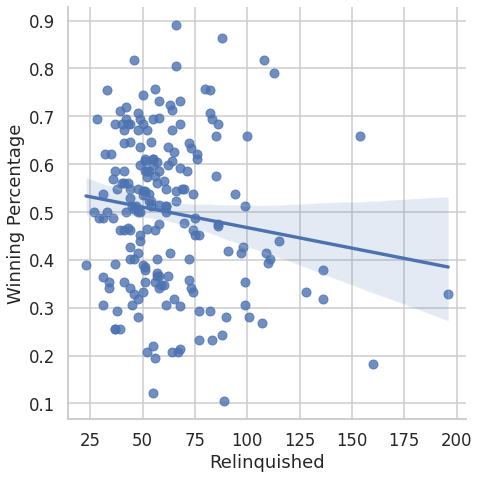

In [ ]:
sns.lmplot(x ='Relinquished', y ='Winning Percentage', data = merged_data, height = 7) 
plt.show()

The graph shows the linear relationship between the total number of injuries (Relinquished) against the Winning Percentage. This plot gave us a better perspective of the weak negative linear relationship between these two variables.

In [ ]:
#create group_merged_data, deleting all injuries and adding net injuries column

grouped_merged_data = merged_data.groupby('Team').sum()
grouped_merged_data['Net_Injuries'] = grouped_merged_data['Relinquished'] - grouped_merged_data['Acquired']
grouped_merged_data['Winning Percentage'] = grouped_merged_data['Winning Percentage'].apply(lambda x: x/6)

#convert Winning Percentagefrom ratio to actual percentage ~ (0-100)
winningPercentage = [x * 100 for x in grouped_merged_data['Winning Percentage']]
grouped_merged_data = grouped_merged_data.assign(winningPercentage=winningPercentage)
Acquired = grouped_merged_data['Acquired']
Relinquished = grouped_merged_data['Relinquished']
Net_Injuries = grouped_merged_data['Net_Injuries']

Here we create an additional data frame called grouped_merged_data in which we:
- Sum the variables by each team
- Create Net_Injuries variable (total number of injured players that didn't return to roster)
- Alter Winning Percentage to the average and change to a % from 0-100
- Also created some variables that will be used below

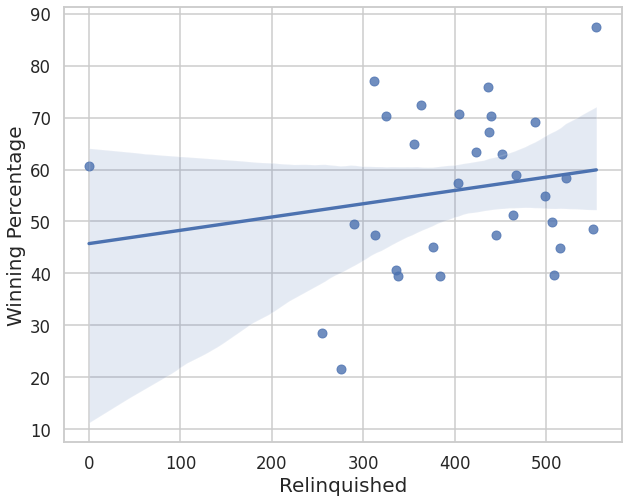

In [ ]:
#x-axis: Relinquished ~ (number of players that got injured per team)
#y-axis: Winning Percentage

plt.figure(figsize=(10,8))
plot = sns.regplot(x=Relinquished, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)
temp = plot.set_xlabel("Relinquished", fontsize = 20)

The graph above shows the relationship between the total number of injuries (Relinquished) against their win percentage. There was a good balance between those who had a good season vs bad season with the same number of injuries. We can see this goes against what we thought: we have a positive slope here.

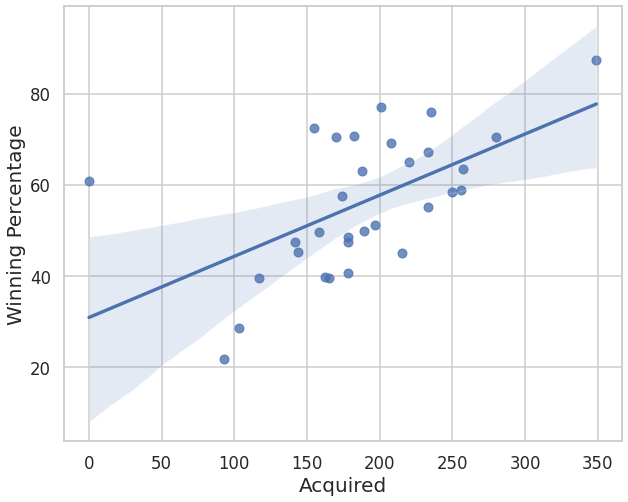

In [ ]:
#x-axis: Acquired ~ (number of players who got injured and returned to roster)
#y-axis: Winning Percentage

plt.figure(figsize=(10,8))
plot = sns.regplot(x=Acquired, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)
temp = plot.set_xlabel("Acquired", fontsize = 20)

The graph above shows the relationship between the total number of players returning from injuries (Acquired) against their win percentage. Teams that got more players back from injury ended up having better records.

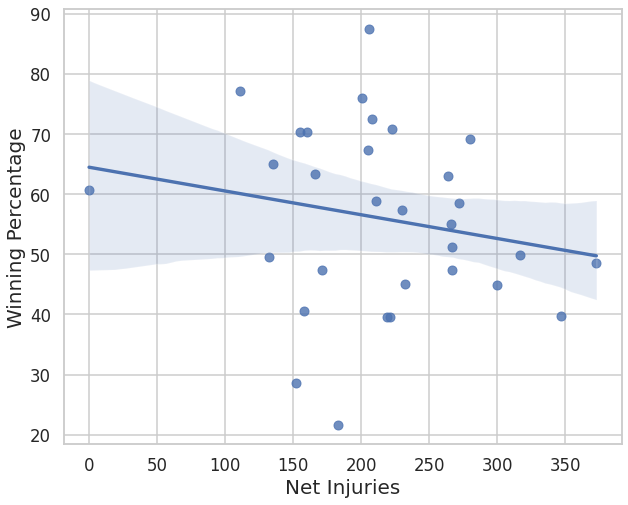

In [ ]:
#x-axis: Net_Injuries ~ (number of players that got injured and didn't return to roster that season)
#y-axis: Winning Percentage

plt.figure(figsize=(10,8))
plot = sns.regplot(x=Net_Injuries, y=winningPercentage)
temp = plot.set_ylabel("Winning Percentage", fontsize = 20)
temp = plot.set_xlabel("Net Injuries", fontsize = 20)
#plt.grid()

The graph above shows the relationship between the difference between Relinquished and Acquired against their win percentage. Teams that got less players back from injury (large x axis values) ended up having a worse record, but the best fit line is not very strong; there are many outliers and the error would be pretty high.

We then run OLS regression models individually on Relinquished and Acquired to see if there exists a significant relationship with the Winning Percentage.

In [ ]:
# Are the amount of injuries in a team correlated to the winning percentage over all years?
# The summary shows that it is not at all. 
outcome, predictors = patsy.dmatrices('winningPercentage ~ Relinquished')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.090
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.305
Time:                        20:42:45   Log-Likelihood:                -126.91
No. Observations:                  31   AIC:                             257.8
Df Residuals:                      29   BIC:                             260.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.7465     10.190      4.489   

In the above linear regression model, we only use one variable 'Relinquished' to predict the winning percentage. From the result, the coefficient is 0.0256, which is close to 0. The p-value is 0.305, which is bigger than the significant level of 0.05. Hence, we fail to reject the null hypothesis and can conclude that there is no significant relationship, and that Relinquished alone might not be a good model to predict the winning percentage.

In [ ]:
# Is the amount of players a team acquired correlated to the winning percentage over all years? 
# The summary shows that this is slightly more probably, but there is no significant correlation. 
outcome, predictors = patsy.dmatrices('winningPercentage ~ Acquired')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     13.79
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           0.000867
Time:                        20:42:46   Log-Likelihood:                -121.45
No. Observations:                  31   AIC:                             246.9
Df Residuals:                      29   BIC:                             249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8418      7.145      4.317      0.0

In the above linear regression model, we only use one variable 'Acquired', which means the number of injured players returning to the game, to predict the winning percentage. From the result, the coefficient is 0.1343, which means for every returning player that recovered from their injuries, the winning percentage increased by 0.1343. The p-value is 0.001, which is smaller than the significant level of 0.05. Hence, we reject the null hypothesis and conclude that there is a significant relationship by convention; thus, we should consider the variable Acquired in our model.


In [ ]:
knee = grouped_merged_data['Knee injuries']
ankle = grouped_merged_data['Ankle injuries']
foot = grouped_merged_data['Foot injuries']
finger = grouped_merged_data['Finger injuries']
back = grouped_merged_data['Back injuries']
hand = grouped_merged_data['Hand injuries']

outcome_1, predictors_1 = patsy.dmatrices('winningPercentage ~ Acquired + knee + ankle + foot + finger + back + hand')
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit() 
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     5.594
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           0.000736
Time:                        20:42:46   Log-Likelihood:                -112.07
No. Observations:                  31   AIC:                             240.1
Df Residuals:                      23   BIC:                             251.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1045      7.139      6.178      0.0

In the above model, we explore if the variables of different types of injuries and the Acquired together can form a linear model to predict the winning percentage.
Here, we see that we have very small p-values for the acquired. This supports the claim that people that have more people returning from injuries have a better winning percentage. This does not support our hypothesis that the more injured players a team has, the lower the team's winning percentage will be since the coefficient for the hand injuries variable is positive. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


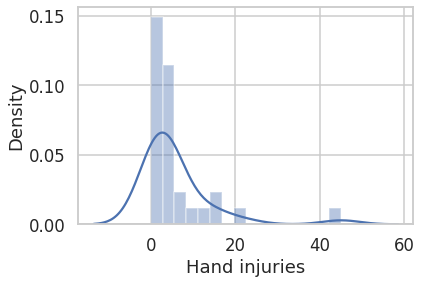

In [ ]:
#take a look at the distribution of hand injuries to see why the coefficient in the model is positive
sns.distplot(grouped_merged_data['Hand injuries'])

In [ ]:
#ignore Season and Year
grouped_merged_data

,Season,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Winning Percentage,Year,Difference,Net_Injuries,winningPercentage
Team,,,,,,,,,,,,,,
76ers,14091,165.0,384.0,79.0,40.0,26.0,9.0,13.0,1.0,0.396000,14091,-0.692167,219.0,39.600000
Bobcats,8046,93.0,276.0,59.0,42.0,10.0,0.0,10.0,2.0,0.216833,8046,-1.037833,183.0,21.683333
Bucks,14091,178.0,551.0,100.0,85.0,59.0,2.0,30.0,13.0,0.485000,14091,-0.506500,373.0,48.500000
Bulls,14091,182.0,405.0,48.0,43.0,24.0,2.0,25.0,1.0,0.707833,14091,0.145500,223.0,70.783333
Cavaliers,14091,233.0,499.0,83.0,77.0,12.0,6.0,35.0,3.0,0.550000,14091,-1.013500,266.0,55.000000
Celtics,14091,188.0,452.0,97.0,82.0,4.0,2.0,9.0,2.0,0.630500,14091,-0.396000,264.0,63.050000
Clippers,14091,155.0,363.0,44.0,23.0,13.0,0.0,19.0,15.0,0.724500,14091,0.494333,208.0,72.450000
Grizzlies,14091,170.0,325.0,55.0,39.0,24.0,1.0,18.0,22.0,0.703833,14091,-0.556333,155.0,70.383333
Hawks,14091,233.0,438.0,47.0,49.0,9.0,1.0,43.0,0.0,0.672500,14091,0.338667,205.0,67.250000


In [ ]:
grouped_merged_data[grouped_merged_data['Hand injuries'] > 40]

,Season,Acquired,Relinquished,Knee injuries,Ankle injuries,Foot injuries,Finger injuries,Back injuries,Hand injuries,Winning Percentage,Year,Difference,Net_Injuries,winningPercentage
Team,,,,,,,,,,,,,,
Timberwolves,14091,162.0,509.0,84.0,98.0,32.0,40.0,27.0,45.0,0.396667,14091,-0.654,347.0,39.666667


One of the possible reasons this phenomenon occurs is that we do not have enough data points. In fact, out of the 12,442 injury data points that we had, only 5,119 were categorized into the 6 groups we see above. Therefore, the remaining half of the injuries could potentially play a significantly greater impact than the ones listed above. Head trauma, back fractures, and other serious but less frequently occurring injuries will probably be more predictive simply due to their severe nature.  

When it comes to the categories we do have, we can see that the distribution of Hand Injuries above is not normally distributed and contains outliers. On this graph one team had 44 hand injuries while most of the teams had less than 10. Hence, it is possible that the team with large amounts of hand injuries are a strong team by coincidence and therefore have a greater winning percentage, which might influence the result of the model.


Since Acquired means how many players come back from injuries and Relinquished means the total number of injuries of all types, we want to consider both of them simultaneously.
Due to the nature of the variables, we try to combine Acquired and Relinquished in our model.

Here we construct a multivariate linear regression model.

In [ ]:
outcome_2, predictors_2 = patsy.dmatrices('winningPercentage ~ Acquired+Relinquished')
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit() 
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:      winningPercentage   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     12.46
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           0.000135
Time:                        20:42:46   Log-Likelihood:                -117.61
No. Observations:                  31   AIC:                             241.2
Df Residuals:                      28   BIC:                             245.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.7885      7.709      5.551   

The above linear regression model is consistent with what we assumed. As we assumed, more acquired (players returning from injuries) would increase the winning percentage; while more relinquished (total number of players who got injured) would decrease the winning percentage. Both variables have a p-value smaller than the significance level 0.05, hence we can reject the null hypothesis and conclude that there exists a significant relationship between acquired + relinquished with winning percentage by convention.

Now we have two linear regression models that we want to consider:
- mod_1: that takes 'Acquired + knee + ankle + foot + finger + back + hand' as variables to predict the winning percentage and 
- mod_2: that only takes 'Acquired + Relinquished'

We will evaluate the model by using Train/Test split to calculate the root of mean squared error. The model with a smaller root of mean squared error will be considered as a better prediction for winning percentage.



In [ ]:
#calculate the RMSE from mod_1
X = grouped_merged_data[['Acquired','Finger injuries','Hand injuries',
                        'Knee injuries', 'Ankle injuries', 'Foot injuries','Back injuries']]
y = grouped_merged_data['winningPercentage']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


20.806928184333792


In [ ]:
#calculate the RMSE from mod_2
X = grouped_merged_data[['Acquired', 'Relinquished']]
y = grouped_merged_data['winningPercentage']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


10.861318226985368


From the above results, we find out that mod_2 has a smaller root mean squared error. This result supports our interpretation of the models because mod_2 shows more relinquish (injuries) decreases winning percentage and more acquired (players coming back) will increase the winning percentage. Also, both two parameters in mod_2 have a p-value that is smaller than the significant level, which means there exists a significant relationship, while mod_1 does not. Therefore, we can conclude that mod_2 is more appropriate than mod_1.

In [ ]:
def predict_model_2(acquired, relinquished):
    predict_y = []
    for idx in range(len(acquired)):
        a = acquired[idx]
        r = relinquished[idx]
        predict_winning_percent = 42.7885 + 0.2441*a - 0.0810*r
        predict_y.append(predict_winning_percent)
    return predict_y

a = list(grouped_merged_data['Acquired'])
r = list(grouped_merged_data['Relinquished'])
y_true = list(grouped_merged_data['winningPercentage'])
y_pred_2 = predict_model_2(a,r)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


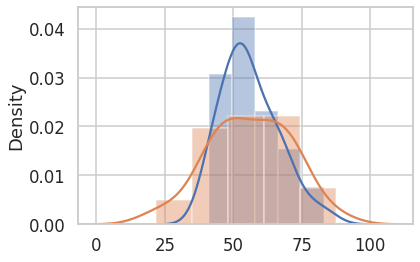

In [ ]:
sns.distplot(y_pred_2)
sns.distplot(y_true)

The above distribution graph shows the distribution for the value of predicted winning percentage (blue) and the true value of winning percentage from 2010-2015 (orange).

Both distribution graphs show roughly normal with similar mean located at the center. However, the True winning percentage curve is more spread out than the predicted winning percentage curve.

In [ ]:
injury2016 = injury_original[injury_original['Season']==2016]
injury2016 = injury2016.groupby(['Team']).count().drop(columns=['Date', 'Notes', 'Season'])
injury2016['pred_win_percent'] = 42.7885 + (6*0.2441*injury2016['Acquired']) - (6*0.0810*injury2016['Relinquished'])
injury2016['2016_win_percent'] = [34.1, 50.0, 51.2, 50.0, 62.2, 64.6, 62.2, 52.4, 52.4, 50.0, 43.9, 62.2, 39.0, 37.8, 31.7, 35.4, 40.2, 24.4, 48.8, 51.2, 41.5, 45.1, 62.2, 67.1, 74.4, 29.3, 57.3, 37.8, 81.7, 59.8]
injury2016['difference'] = abs(injury2016['2016_win_percent']-injury2016['pred_win_percent'])
injury2016

,Acquired,Relinquished,pred_win_percent,2016_win_percent,difference
Team,,,,,
76ers,40,72,66.3805,34.1,32.2805
Blazers,27,47,59.4907,50.0,9.4907
Bucks,37,52,71.7067,51.2,20.5067
Bulls,55,70,89.3215,50.0,39.3215
Cavaliers,47,64,80.5207,62.2,18.3207
Celtics,50,65,84.4285,64.6,19.8285
Clippers,25,41,59.4775,62.2,2.7225
Grizzlies,48,60,83.9293,52.4,31.5293
Hawks,35,56,66.8335,52.4,14.4335


We will try to use our equation from 2010-2015 data to predict the winning percentages from 2016. The above data frame shows the number of Acquired and Relinquished players for each team for the 2016 season. It then predicts the win percentages based on these numbers. It also shows the True win percentages from the 2016 season as well as the differences between them to see how close our predictions were.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'winning percentage')

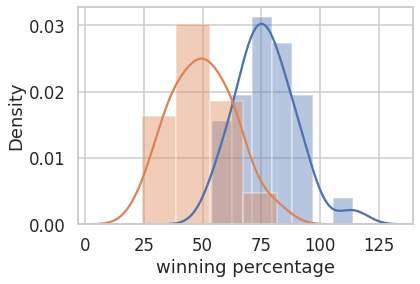

In [ ]:
sns.distplot(injury2016['pred_win_percent']) #blue
sns.distplot(injury2016['2016_win_percent']) #orange
plt.xlabel('winning percentage')

The above distribution graph shows the distribution for the value of predicted winning percentage (blue) and the true value of winning percentage from 2016 (orange).

In [ ]:
x = injury2016['pred_win_percent']
y = injury2016['2016_win_percent']



In order to see if our model works, we use the selected model to predict the winning percentage. 
- x: the predicted winning percentage for 2016 by using our linear regression model.
- y: the true winning percentage of teams in 2016

If we want to see if our model works, we need to compare the distribution of the predicted winning percentage for 2016 with the true winning percentage in 2016. Therefore, we use a two-sample Kolmogorov-Smirnov test, which is included in the scipy.stats in order to compare the two distributions.

Under the null hypothesis, the two distributions are identical, which means our model can efficiently predict the winning percentage in 2016. If the K-S statistic is small or the p-value is higher than the significance level 0.05, then we fail to reject the hypothesis and we conclude that the distributions of the predicted winning percentage and the true winning percentage are the same. Conversely, if p-value is smaller than 0.05, then we can reject the null hypothesis and that implies that our model does not correctly predict the winning percentage.

In [ ]:
ks_2samp(x, y)

Ks_2sampResult(statistic=0.7666666666666667, pvalue=6.531235554884833e-09)

From the result above, we have a p-value smaller than the significance level 0.05. Therefore, we reject the null hypothesis and conclude that the predicted winning percentage for 2016 by using our linear regression model is not the same distribution as the true winning percentage in 2016.

## **Ethics & Privacy**
We got our data from Kaggle and information made public by the NBA. With the topic we chose, there is not really much of a privacy concern to worry about since all of the data participants/subjects are professional basketball players and teams whose information is knowingly and voluntarily public. Therefore, there is no reason or need to use some sort of ID number to hide the players’ privacy. We will do our best to make sure we explain all the analysis we conduct and how we conduct it in order to be as transparent as possible.



## **Conclusion & Discussion**
In closing, we can confidently conclude that there does exist a relationship between an NBA team’s number and injuries in general. The higher the number of acquired players from injuries, the better a team’s winning percentage will be. This is clearly depicted in the small mean squared error above between the acquired, relinquished, and injured categories and the miniscule p-value between the acquired and winning percentage categories in the OLS regression. We did notice that of our 6 labeled injury types, the 3 lower extremity injury categories had a stronger negative correlation with winning percentage than the upper extremity injuries. However, due to a lack of data, our analysis was not able to thoroughly conclude if the type of the injury is actually relevant to a team’s winning record.

Despite these findings, there were several limitations with our approach. The first and foremost one is the categorization of the injury data. This task required some natural language processing and splitting the injuries into the broadest groups possible (i.e. hand, foot, ankle, etc.). Unfortunately, roughly half of the data remained uncategorized and simply part of the relinquished category. While more categories could have been added, our team decided not to move forth with this idea since the proposed categories contained less than a hundred injuries; such few data points would not be useful in any meaningful analysis. In fact, this leads into our second limitation: the small amount of data in the existing categories. As described in our analysis, the category “Hand Injuries” had 184 injuries in total for example, but 44 of them came from the Timberwolves team alone! The main reason for such large variation is the limited number of data from the datasets available to us. Our analysis relied on historical team performance and player injuries; therefore, we had to have both available for a given season in order to include that season. This led to us using only seasons 2010-2020, and with 82 games a year per team, this equated to 820 games for every team over that decade. While this seems like a reasonable amount of data, only the games that produced injuries would be included, and only the identifiable injuries would be included and further filtered down further into their respective categories. This is what ultimately led to a shortage of data for some of the injury categories.

Due to the difficulty of categorization and the overall shortage of data, our results cannot completely dismiss the impact of certain types of injuries on a team’s number (their winning percentage). Therefore, while acquired injuries certainly play a role, only an analysis without these limitations could say for certain how the type of injury contributes to a team’s number. 

## **Team Contributions**

Connor McManigal: summarized results, background info, hypothesis, data cleaning of original datasets, and made plots

Matthew Cohen: ethics and privacy, summarized plot results, modeled and tested how accurate our data is at predicting future seasons

Egor Pustovalov: conclusion & discussion, constructed original OLS models, helped with data cleaning and data visualization

Xuwen Yan(Ella): constructed and ran the linear regression models, overview, compared models with different parameters, helped with interpreting the results. 

Ryan Swartz: cleaned the datasets, summarized data cleaning, constructed plots, organized setup and group collaboration